1 - Instalación de librerías necesarias YOLOv8

In [ ]:
!pip -q install ultralytics roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 80.0 MB/s eta 0:00:00


2 - Importar librerias

In [ ]:
from google.colab import drive
import os

3 - montar Google Drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive

'Colab Notebooks'
'comprobante (4).pdf'
 Dataset_YOLO
 Dataset_YOLO-20251213T163326Z-3-001.zip
'earth engine.txt'
 historia_academica.pdf
 ipdi
 quispe_CARNET.pdf
 quispe_DEFINITIVA.pdf
 quispe_FOTOS.pdf
 quispe_PARTIDA.pdf
'Sist. de Información 2025 - Trabajo de Campo'


4 - ir a la carpeta comartida

In [ ]:
shared_folder = "/content/drive/MyDrive/Dataset_YOLO"
os.chdir(shared_folder)

5 - verificar que el dataset este ahi

In [ ]:
!ls

drive  Dteccion-de-copas-2  sample_data


6 - Importar YOLO v8

In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


 7. Cargar modelo preentrenado (YOLOv8n)

In [ ]:
model = YOLO("yolov8m.pt")


8. Entrenar el modelo

In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8m.pt")  # modelo base

results = model.train(
    data="/content/drive/MyDrive/Dataset_YOLO/data.yaml",
    epochs=100,
    imgsz=640,
    batch=16,
    device=0,
    project="/content/drive/MyDrive/yolo_runs",
    name="copas_yolov8m_drive_e100",  # nombre distinto
    exist_ok=False                   # no pisa
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.237 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Dataset_YOLO/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, i

In [ ]:
!ls /content/drive/MyDrive/yolo_runs/copas_yolov8m_drive_e100/weights


ls: cannot access '/content/drive/MyDrive/yolo_runs/copas_yolov8m_drive_e100/weights': No such file or directory


Descargar en Mi drive los modelos best.pt y last.pt

In [ ]:
import os, glob, shutil

project_dir = '/content/drive/MyDrive/yolo_runs'
run_dirs = glob.glob(os.path.join(project_dir, 'copas_yolov8m_drive'))
if not run_dirs:
    # fallback: use most recent run folder
    candidates = glob.glob(os.path.join(project_dir, '*'))
    if not candidates:
        raise FileNotFoundError(f'No se encontraron corridas en {project_dir}')
    run_dir = max(candidates, key=os.path.getmtime)
else:
    run_dir = run_dirs[0]

source_dir = os.path.join(run_dir, 'weights')
destination_dir = '/content/drive/MyDrive/Dataset_YOLO/trained_models'
os.makedirs(destination_dir, exist_ok=True)

for w in ['best.pt', 'last.pt']:
    src = os.path.join(source_dir, w)
    if os.path.exists(src):
        shutil.copy(src, destination_dir)
        print(f"'{w}' copiado a {destination_dir}")
    else:
        print(f"No existe {src} (¿terminó el entrenamiento?)")


'best.pt' copiado a /content/drive/MyDrive/Dataset_YOLO/trained_models
'last.pt' copiado a /content/drive/MyDrive/Dataset_YOLO/trained_models


Revizar lo que ya entreno con fotos del dataset

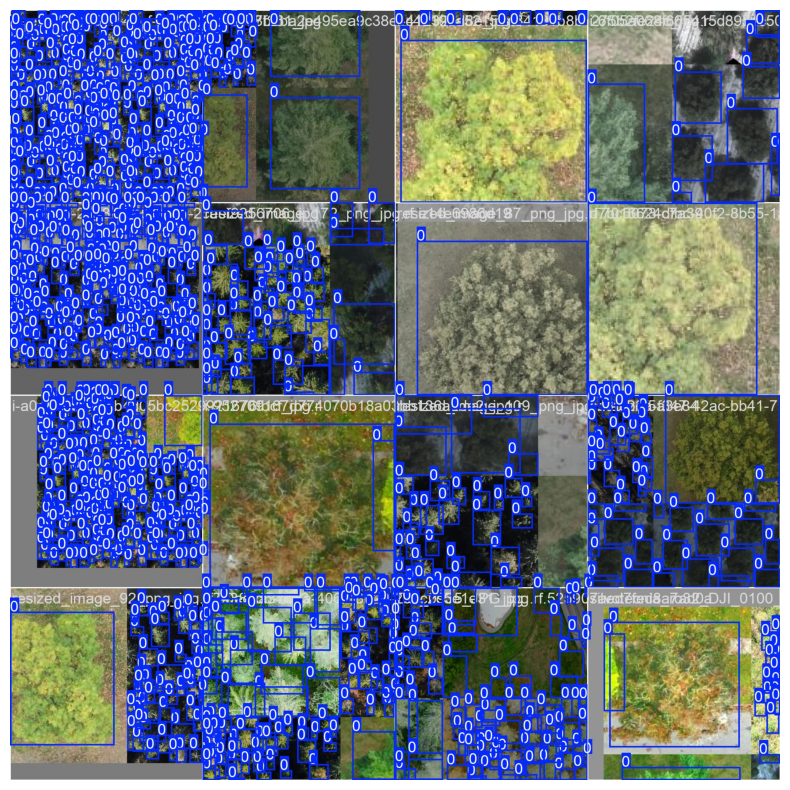

In [ ]:
import matplotlib.pyplot as plt
import cv2

img_path = "/content/drive/MyDrive/yolo_runs/copas_yolov8m_drive/train_batch0.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis("off")
plt.show()

## 9 - Fine-tuning con dataset de Roboflow (continuar desde best.pt)



In [ ]:
from roboflow import Roboflow
from ultralytics import YOLO
import os

# --- Roboflow ---
ROBOFLOW_API_KEY = "EqOx7jeW3RyUO4CROG0v"
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

project = rf.workspace("enrique2025").project("dteccion-de-copas")

# v2 = 35 img
dataset = project.version(2).download("yolov8")
robo_yaml = os.path.join(dataset.location, "data.yaml")
print("Roboflow data.yaml:", robo_yaml)

# best.pt del entrenamiento base (100 epoc) ---
best_path = "/content/drive/MyDrive/yolo_runs/copas_yolov8m_drive_e100/weights/best.pt"

model_ft = YOLO(best_path)

# --- Fine-tuning carpeta nueva
model_ft.train(
    data=robo_yaml,
    epochs=50,
    imgsz=640,
    batch=16,
    device=0,
    project="/content/drive/MyDrive/yolo_runs",
    name="copas_yolov8m_finetune_roboflow_from_e100_e150",
    exist_ok=False,
)



loading Roboflow workspace...
loading Roboflow project...
Roboflow data.yaml: /content/Dteccion-de-copas-2/data.yaml
Ultralytics 8.3.237 🚀 Python-3.12.12 torch-2.9.0+cpu 


ValueError: Invalid CUDA 'device=0' requested. Use 'device=cpu' or pass valid CUDA device(s) if available, i.e. 'device=0' or 'device=0,1,2,3' for Multi-GPU.

torch.cuda.is_available(): False
torch.cuda.device_count(): 0
os.environ['CUDA_VISIBLE_DEVICES']: None
See https://pytorch.org/get-started/locally/ for up-to-date torch install instructions if no CUDA devices are seen by torch.


# Cargar  los modelos ya entrenados best.pt y last.pt para seguir con el entrenamiento





In [ ]:
from google.colab import drive
drive.mount("/content/drive")
!pip -q install ultralytics


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from ultralytics import YOLO

VIDEO = "/content/drive/MyDrive/videos/14857593_1920_1080_30fps.mp4"
BEST_BASE = "/content/drive/MyDrive/yolo_runs/copas_yolov8m_drive/weights/best.pt"
OUT_DIR = "/content/drive/MyDrive/yolo_runs_video_tests"

model = YOLO(BEST_BASE)

for _ in model.predict(
    source=VIDEO,
    conf=0.25,
    imgsz=640,
    save=True,
    project=OUT_DIR,
    name="pred_base_sin_texto",
    exist_ok=True,
    stream=True,
    show_labels=False,
    show_conf=False,
    line_width=2
):
    pass




video 1/1 (frame 1/316) /content/drive/MyDrive/videos/14857593_1920_1080_30fps.mp4: 384x640 146 0s, 25.8ms
video 1/1 (frame 2/316) /content/drive/MyDrive/videos/14857593_1920_1080_30fps.mp4: 384x640 142 0s, 25.1ms
video 1/1 (frame 3/316) /content/drive/MyDrive/videos/14857593_1920_1080_30fps.mp4: 384x640 145 0s, 25.1ms
video 1/1 (frame 4/316) /content/drive/MyDrive/videos/14857593_1920_1080_30fps.mp4: 384x640 146 0s, 25.1ms
video 1/1 (frame 5/316) /content/drive/MyDrive/videos/14857593_1920_1080_30fps.mp4: 384x640 144 0s, 25.2ms
video 1/1 (frame 6/316) /content/drive/MyDrive/videos/14857593_1920_1080_30fps.mp4: 384x640 147 0s, 25.1ms
video 1/1 (frame 7/316) /content/drive/MyDrive/videos/14857593_1920_1080_30fps.mp4: 384x640 143 0s, 25.1ms
video 1/1 (frame 8/316) /content/drive/MyDrive/videos/14857593_1920_1080_30fps.mp4: 384x640 146 0s, 25.3ms
video 1/1 (frame 9/316) /content/drive/MyDrive/videos/14857593_1920_1080_30fps.mp4: 384x640 143 0s, 26.0ms
video 1/1 (frame 10/316) /content/dr

In [ ]:
from ultralytics import YOLO

# Video en Drive (FHD)
VIDEO = "/content/drive/MyDrive/videos/14857593_1920_1080_30fps.mp4"

# Best del fine-tuning
BEST_FT = "/content/drive/MyDrive/yolo_runs/copas_yolov8m_finetune_roboflow/weights/best.pt"

# Carpeta de salida en Drive
OUT_DIR = "/content/drive/MyDrive/yolo_runs_video_tests"

model_ft = YOLO(BEST_FT)

for _ in model_ft.predict(
    source=VIDEO,
    conf=0.50,
    iou=0.50,               #reducir cajas superpuestas
    imgsz=640,
    save=True,
    project=OUT_DIR,
    name="pred_finetune_sin_texto",
    exist_ok=True,
    stream=True,
    show_labels=False,      # sin clase "0"
    show_conf=False,        # sin num
    line_width=2
):
    pass

print("Listo. Video guardado en:", OUT_DIR + "/detect/pred_finetune_sin_texto")




video 1/1 (frame 1/316) /content/drive/MyDrive/videos/14857593_1920_1080_30fps.mp4: 384x640 79 copass, 25.9ms
video 1/1 (frame 2/316) /content/drive/MyDrive/videos/14857593_1920_1080_30fps.mp4: 384x640 79 copass, 25.1ms
video 1/1 (frame 3/316) /content/drive/MyDrive/videos/14857593_1920_1080_30fps.mp4: 384x640 78 copass, 25.1ms
video 1/1 (frame 4/316) /content/drive/MyDrive/videos/14857593_1920_1080_30fps.mp4: 384x640 77 copass, 25.1ms
video 1/1 (frame 5/316) /content/drive/MyDrive/videos/14857593_1920_1080_30fps.mp4: 384x640 74 copass, 25.0ms
video 1/1 (frame 6/316) /content/drive/MyDrive/videos/14857593_1920_1080_30fps.mp4: 384x640 77 copass, 25.1ms
video 1/1 (frame 7/316) /content/drive/MyDrive/videos/14857593_1920_1080_30fps.mp4: 384x640 79 copass, 25.1ms
video 1/1 (frame 8/316) /content/drive/MyDrive/videos/14857593_1920_1080_30fps.mp4: 384x640 80 copass, 25.1ms
video 1/1 (frame 9/316) /content/drive/MyDrive/videos/14857593_1920_1080_30fps.mp4: 384x640 83 copass, 25.1ms
video 1/1